In [3]:
import pandas as pd

# Load the CSV file with encoding='latin-1'
df = pd.read_csv(r'C:\Users\user\Desktop\IBM\Project\Superstore-Sales_IBM_proj.csv', encoding='latin-1')

# Display the first few rows of the DataFrame
print(df.head())

   Row ID  Order ID  Order Date Order Priority  Order Quantity       Sales  \
0       1         3  10/13/2010            Low               6    261.5400   
1      49       293   10/1/2012           High              49  10123.0200   
2      50       293   10/1/2012           High              27    244.5700   
3      80       483   7/10/2011           High              30   4965.7595   
4      85       515   8/28/2010  Not Specified              19    394.2700   

   Discount       Ship Mode   Profit  Unit Price  ...       Customer Name  \
0      0.04     Regular Air  -213.25       38.94  ...  Muhammed MacIntyre   
1      0.07  Delivery Truck   457.81      208.16  ...        Barry French   
2      0.01     Regular Air    46.71        8.69  ...        Barry French   
3      0.08     Regular Air  1198.97      195.99  ...       Clay Rozendal   
4      0.08     Regular Air    30.94       21.78  ...      Carlos Soltero   

  Province   Region Customer Segment Product Category  \
0  Nunavut 

In [4]:
# Display basic information about the DataFrame
print(df.info())

# Display summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row ID                8399 non-null   int64  
 1   Order ID              8399 non-null   int64  
 2   Order Date            8399 non-null   object 
 3   Order Priority        8399 non-null   object 
 4   Order Quantity        8399 non-null   int64  
 5   Sales                 8399 non-null   float64
 6   Discount              8399 non-null   float64
 7   Ship Mode             8399 non-null   object 
 8   Profit                8399 non-null   float64
 9   Unit Price            8399 non-null   float64
 10  Shipping Cost         8399 non-null   float64
 11  Customer Name         8399 non-null   object 
 12  Province              8399 non-null   object 
 13  Region                8399 non-null   object 
 14  Customer Segment      8399 non-null   object 
 15  Product Category     

In [5]:
# Handle duplicates
print("Duplicates before:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Duplicates after:", df.duplicated().sum())

# Handle missing values (example: drop rows with missing critical columns)
df.dropna(subset=['Profit', 'Product Base Margin'], inplace=True)

Duplicates before: 0
Duplicates after: 0


In [6]:
# Fill missing values or drop rows/columns with missing values
df.fillna(0, inplace=True)  # Example: Fill missing values with 0
# df.dropna(inplace=True)  # Example: Drop rows with missing values

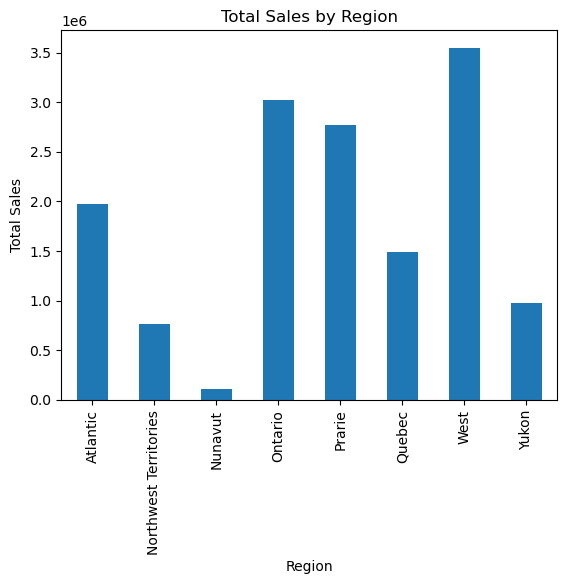

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Region and sum the Sales
sales_by_region = df.groupby('Region')['Sales'].sum()

# Plot the results
sales_by_region.plot(kind='bar')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

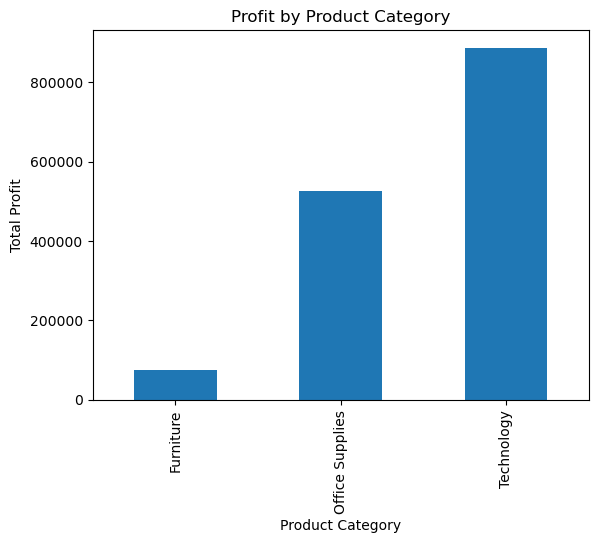

In [8]:
# Group by Product Category and sum the Profit
profit_by_category = df.groupby('Product Category')['Profit'].sum()

# Plot the results
profit_by_category.plot(kind='bar')
plt.title('Profit by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Profit')
plt.show()

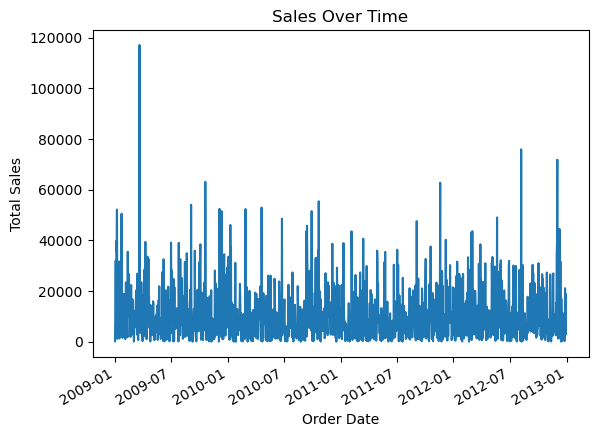

In [9]:
# Convert Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Group by Order Date and sum the Sales
sales_over_time = df.groupby('Order Date')['Sales'].sum()

# Plot the results
sales_over_time.plot()
plt.title('Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.show()

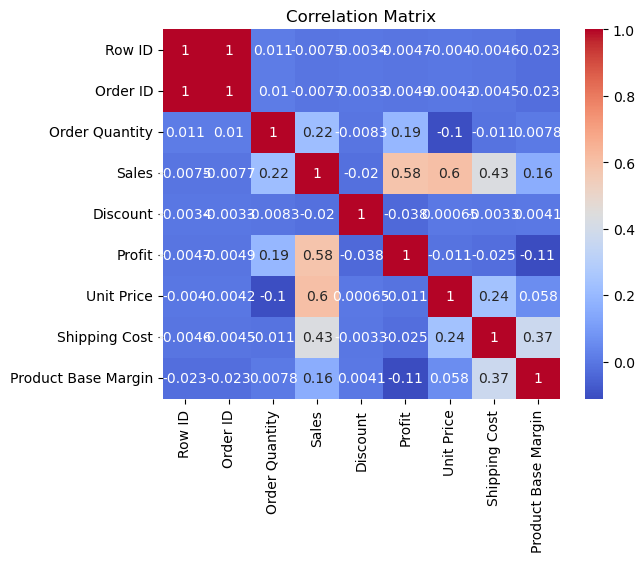

In [10]:

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [11]:
from sklearn.ensemble import IsolationForest

# Train model to detect anomalies in Profit
clf = IsolationForest(contamination=0.05)
df['Anomaly'] = clf.fit_predict(df[['Profit']])
anomalies = df[df['Anomaly'] == -1]

# Example: Adjust weights for underrepresented groups (e.g., Customer Segment)
from sklearn.utils import class_weight

weights = class_weight.compute_sample_weight('balanced', df['Customer Segment'])
df['Weight'] = weights

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Feature engineering
X = df[['Discount', 'Unit Price', 'Order Quantity']]
y = df['Sales']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)
print("R2 Score:", model.score(X_test, y_test))

R2 Score: 0.8845216892204791


In [12]:
# Save the cleaned DataFrame to a new CSV file
df.to_csv('cleaned_superstore_sales.csv', index=False)

2025-02-19 19:03:42.845 
  command:

    streamlit run C:\Users\user\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]
C:\Users\user\AppData\Local\Temp\ipykernel_17008\4284366669.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  """.format(missing_before[0], missing_before[1], missing_after[0], missing_after[1]))


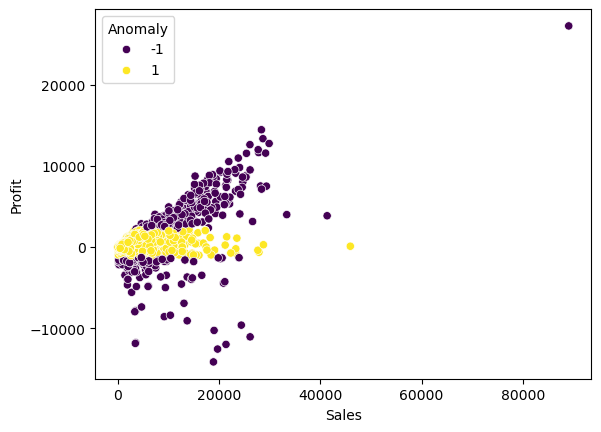

In [13]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest, RandomForestRegressor
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split

# Load the data
df = pd.read_csv(r'C:\Users\user\Desktop\IBM\Project\Superstore-Sales_IBM_proj.csv', encoding='latin-1')

# Title of the dashboard
st.title('Superstore Sales Dashboard')

# ======================================
# Data Cleaning Section
# ======================================
st.write('## Data Cleaning Report')

# Handle duplicates
initial_count = len(df)
df.drop_duplicates(inplace=True)
final_count = len(df)
st.write(f"Removed **{initial_count - final_count} duplicates**")

# Handle missing values
missing_before = df[['Profit', 'Product Base Margin']].isnull().sum()
df.dropna(subset=['Profit', 'Product Base Margin'], inplace=True)
missing_after = df[['Profit', 'Product Base Margin']].isnull().sum()

st.write("""
### Missing Values Handling:
- **Before Cleaning:**  
  Profit: {0}, Product Base Margin: {1}  
- **After Cleaning:**  
  Profit: {2}, Product Base Margin: {3}
""".format(missing_before[0], missing_before[1], missing_after[0], missing_after[1]))

# ======================================
# Data Preview
# ======================================
st.write('### Cleaned Data Preview')
st.write(df.head())

# ======================================
# Basic Visualizations
# ======================================
st.write('## Sales Analysis')

# Sales by Region
st.write('### Total Sales by Region')
sales_by_region = df.groupby('Region')['Sales'].sum()
st.bar_chart(sales_by_region)

# Profit by Category
st.write('### Profit by Product Category')
profit_by_category = df.groupby('Product Category')['Profit'].sum()
st.bar_chart(profit_by_category)

# ======================================
# Advanced Features
# ======================================
st.write('## Advanced Analytics')

# Anomaly Detection
st.write('### Profit Anomaly Detection')
clf = IsolationForest(contamination=0.05)
df['Anomaly'] = clf.fit_predict(df[['Profit']])
anomalies = df[df['Anomaly'] == -1]

# Plot anomalies
fig, ax = plt.subplots()
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Anomaly', palette='viridis')
st.pyplot(fig)
st.write(f"Detected **{len(anomalies)} anomalies** in profit data")

# Download anomalies
st.download_button(
    label="Download Anomalies Data",
    data=anomalies.to_csv(index=False),
    file_name='anomalies.csv'
)

# Bias Correction
st.write('### Customer Segment Bias Correction')
weights = class_weight.compute_sample_weight('balanced', df['Customer Segment'])
df['Weight'] = weights

# Show weight distribution
st.write("Sample Weight Distribution by Segment:")
weight_dist = df.groupby('Customer Segment')['Weight'].mean()
st.bar_chart(weight_dist)

# ======================================
# Predictive Model
# ======================================
st.write('## Sales Prediction Model')

# Feature selection
features = st.multiselect(
    "Select features for prediction:",
    df.columns,
    default=['Discount', 'Unit Price', 'Order Quantity']
)

if features:
    X = df[features]
    y = df['Sales']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train model
    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    # Evaluate model
    r2_score = model.score(X_test, y_test)
    st.write(f"Model R2 Score: **{r2_score:.2f}**")

    # Predictions
    st.write('### Make Predictions')
    input_data = {}
    for feature in features:
        input_data[feature] = st.number_input(f"Enter {feature}:", value=float(df[feature].mean()))

    if st.button('Predict Sales'):
        prediction = model.predict([list(input_data.values())])
        st.write(f"Predicted Sales: **{prediction[0]:.2f}**")
else:
    st.warning("Please select at least one feature for prediction.")